# LELA60331 Week 5 Seminar Workbook

This week we will look at Logistic regression and at model training using stochastic gradient descent.

We will start by looking at fitting linear regression models with the same algorithm

### Linear regression with one predictor

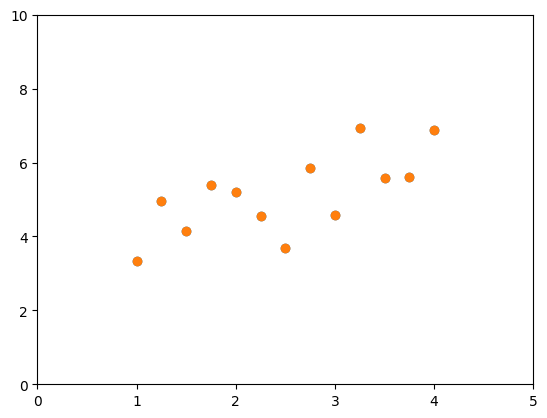

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = [1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00]
y = [3.34,4.97,4.15,5.40,5.21,4.56,3.69,5.86,4.58,6.94,5.57,5.62,6.87]
x = np.array(x)
y = np.array(y)

plt.scatter(x, y)
plt.ylim(0,10)
plt.xlim(0,5)
plt.scatter(x, y)

plt.show()

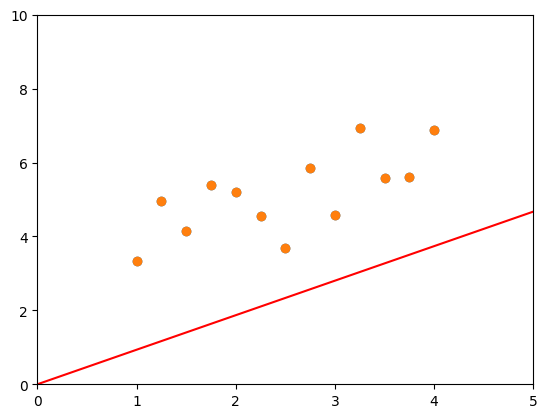

In [122]:

num_features=1
weights = np.random.rand(num_features)
bias=0

plt.scatter(x, y)
plt.ylim(0,10)
plt.xlim(0,5)
line_x = [0, 5]
line_y = [bias, bias+(5*weights[0])]

plt.scatter(x, y)
plt.plot(line_x, line_y, label='Line', color='red')  # Adding a line

plt.show()


Stochastic gradient descent works as follows:

For linear regression our loss is ...

The gradient for each weight is....
The gradient for the bias is.

Problem 1: Complete the code below so that it finds the line of best fit

In [ ]:
n_iters = 25
num_features=1
weights = np.random.rand(num_features)
bias=0

num_samples = len(y)
learning_rate=0.1

for i in range(n_iters):
    y_est = x*weights[0]+bias

    errors = ???
    loss = np.sum(errors)
    print(loss)

    dw = (1 / num_samples) * sum(x*errors) ????
    db = (1 / num_samples) * sum(errors) ???
    weights = weights - lr * dw ????
    bias = bias - lr * db

In [132]:
n_iters = 25
num_features=1
weights = np.random.rand(num_features)
bias=0

num_samples = len(y)
lr=0.1

for i in range(n_iters):
    y_est = x*weights[0]+bias

    errors = y_est - y
    loss = np.sum(errors)
    print(loss)

    dw = (1 / num_samples) * sum(x*errors)
    db = (1 / num_samples) * sum(errors)
    weights = weights - lr * dw
    bias = bias - lr * db

-54.743091806889424
-13.932704713791765
-5.801755080525671
-4.155290858042599
-3.795813459372428
-3.692052652113901
-3.639384132983409
-3.5972033249404562
-3.5574498122687856
-3.518520499549626
-3.4800935675574323
-3.4421014634378357
-3.404527125199288
-3.367363548974473
-3.3306057660868307
-3.2942492507418644
-3.2582896036614324
-3.222722488889848
-3.1875436208381513
-3.1527487613006615
-3.1183337184550526
-3.0842943462601253
-3.0506265439370894
-3.0173262554717404
-2.9843894691250483


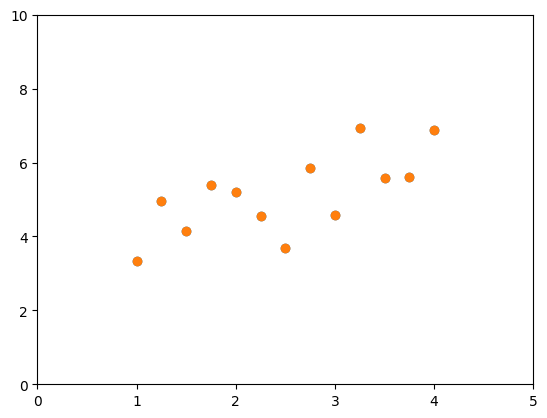

In [129]:
plt.scatter(x, y)
plt.ylim(0,10)
plt.xlim(0,5)
line_x = [0, 5]
line_y = [bias, bias+(5*weights[0])]

plt.scatter(x, y)
plt.plot(line_x, line_y, label='Line', color='red')  # Adding a line

plt.show()

Increase the learning rate to 2. What do you notice?

Decrease the learning rate to 0.001. What do you notice?

What is the value of y when x is n.

### Linear Regression with 2 predictors

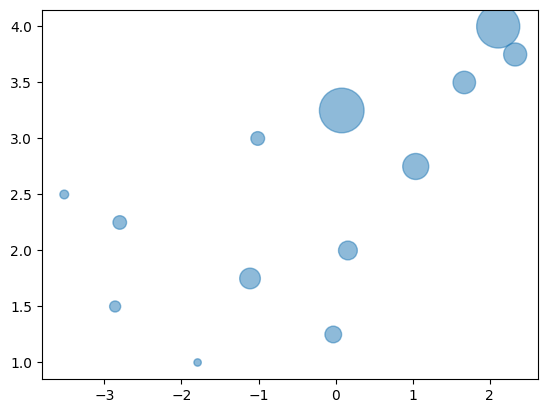

In [106]:
x=[[-1.79, -0.03, -2.86, -1.11, 0.16, -2.80, -3.52, 1.04, -1.01, 0.08, 1.67, 2.33, 2.11],[1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00]]
y = [3.34,4.97,4.15,5.40,5.21,4.56,3.69,5.86,4.58,6.94,5.57,5.62,6.87]
x = np.array(x)
y = np.array(y)
plt.scatter(x[0], x[1], s=np.exp(y), alpha=0.5)
plt.show()

Problem 2: Complete the code below so that it finds the line of best fit

In [ ]:
n_iters = 25
num_features = 2
weights = np.random.rand(num_features)
bias=0
num_samples = len(y)
lr=0.2

for i in range(n_iters):
    y_est = x[0]*weights[0]+x[1]*weights[1]+bias
    errors = ??
    loss = np.sum(errors)
    print(loss)
    dw1 = ???
    dw2 = ???
    db = ???
    weights[0] = ???
    weights[1] = ???
    bias = bias - lr * db

In [109]:
n_iters = 25
num_features = 2
weights = np.random.rand(num_features)
bias=0
num_samples = len(y)
lr=0.2

for i in range(n_iters):
    y_est = x[0]*weights[0]+x[1]*weights[1]+bias
    errors = y_est - y
    error = np.sum(errors)
    dw1 = (1 / num_samples) * sum(x[0]*errors)
    dw2 = (1 / num_samples) * sum(x[1]*errors)
    db = (1 / num_samples) * sum(errors)
    weights[0] = weights[0] - lr * dw1
    weights[1] = weights[1] - lr * dw2
    bias = bias - lr * db

What is the value of y when x1 is nn and x2 is nn.

### Logistic Regression

In [133]:
## Create simulated data
w1_center = (3, 3)
w2_center = (3, -2)
batch_size=50

x = np.zeros((batch_size, 2))
y = np.zeros(batch_size)
for i in range(batch_size):
    if np.random.random() > 0.5:
        x[i] = np.random.normal(loc=w1_center)
    else:
        x[i] = np.random.normal(loc=w2_center)
        y[i] = 1

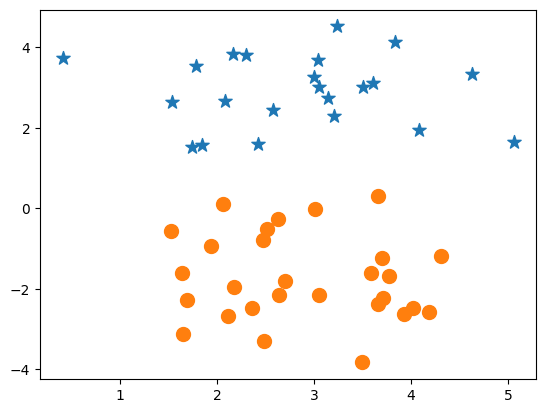

In [134]:
plt.scatter(x[y==0,0], x[y==0,1], marker='*', s=100)
plt.scatter(x[y==1,0], x[y==1,1], marker='o', s=100)


In [142]:
num_features=2
weights = np.random.rand(num_features)
bias=0

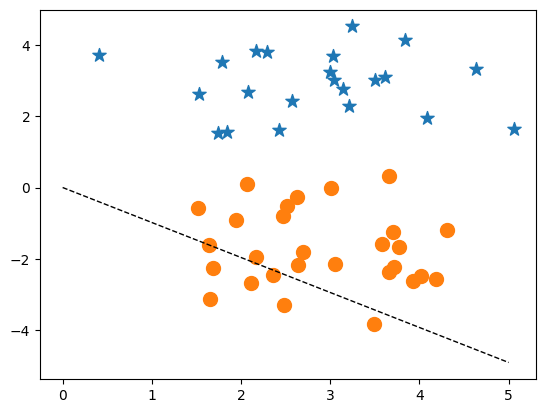

In [143]:
plt.scatter(x[y==0,0], x[y==0,1], marker='*', s=100)
plt.scatter(x[y==1,0], x[y==1,1], marker='o', s=100)
c = -bias/weights[1]
m = -weights[0]/weights[1]
xmin, xmax = 0, 5
ymin, ymax = -5, 5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')

Problem 3: Complete code below so that it finds the line of best fit

In [ ]:
n_iters = 25
num_features = 2
num_samples = len(y)
lr=0.2

for i in range(n_iters):
    z=????
    q =????
    loss = sum(-(y*np.log2(q)+(1-y)*np.log2(1-q)))
    dw1 = sum(x[:,0]*(q-y))/num_samples
    dw2 = sum(x[:,1]*(q-y))/num_samples
    db = sum((q-y))/num_samples
    weights[0] = ?????
    weights[1] = ??????
    bias = ??????
    print(loss)


In [ ]:
n_iters = 25
num_features = 2
num_samples = len(y)
lr=0.2

for i in range(n_iters):
    z=x[:,0]*weights[0]+x[:,1]*weights[1]+bias
    q = 1 / (1 + pow(math.e,-z))
    loss = sum(-(y*np.log2(q)+(1-y)*np.log2(1-q)))
    dw1 = sum(x[:,0]*(q-y))/num_samples
    dw2 = sum(x[:,1]*(q-y))/num_samples
    db = sum((q-y))/num_samples
    weights[0] = weights[0] - lr*dw1
    weights[1] = weights[1] - lr*dw2
    bias = bias - lr*db
    print(loss)


In [ ]:
plt.scatter(x[y==0,0], x[y==0,1], marker='*', s=100)
plt.scatter(x[y==1,0], x[y==1,1], marker='o', s=100)
c = -bias/weights[1]
m = -weights[0]/weights[1]
xmin, xmax = 0, 5
ymin, ymax = -5, 5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')

What is p(y=1) when x1 is nn and x2 is nn.